# Charity Report

## Analysis Overview

The purpose of this analysis is to train a neural network to designate which charitable organizations the Alphabet Soup foundation should support monetarily based off of if the neural network determines they will succeed or not. This neural network was trained on a CSV featuring 34,000 organizations which the foundation has supported in the past which includes what type of organization they are, their financial state, how much money they requested and whether or not they were successful. The aim was to create a model with at least 75% accuracy to ensure that the Alphabet Soup foundation's funds will not be squandered whilst still taking some risk for the sake of philanthropy.

## Results

### Data Preprocessing

#### Target and Feature Identification

The first step in training our neural network was processing the data so that it would only contain the data which would be useful for our model. The CSV file our data is sourced from contains the following columns.<br>
- EIN and NAME: Identification columns
- APPLICATION_TYPE: Alphabet Soup application type
- AFFILIATION: Affiliated sector of industry
- CLASSIFICATION: Government organization classification
- USE_CASE: Use case for funding
- ORGANIZATION: Organization type
- STATUS: Active status
- INCOME_AMT: Income classification
- SPECIAL_CONSIDERATIONS: Special consideration for application
- ASK_AMT: Funding amount requested
- IS_SUCCESSFUL: Was the money used effectively

We split the columns into three categories; targets, features and ones that are neither. <br>
1. Targets are the variables that we are trying to predict. In this case, we are only concerned with if the organization was successful after receiving funding therefore the only target variable is 'IS_SUCCESSFUL'
2. Features are the variables which will be useful for predicting the success of the charitable organization if they are given the requested funding. We have identified the following variables as features.
    - APPLICATION_TYPE
    - AFFILIATION
    - CLASSIFICATION
    - USE_CASE
    - ORGANIZATION
    - INCOME_AMT
    - SPECIAL_CONSIDERATIONS
    - ASK_AMT
3. The final category is variables that are neither features nor targets. This is data which is not useful for our model or could be detrimental to it so it is excluded from the model.
    - EIN and NAME: These are identifying variables. They are unique to each organization and do not provide any information about the organizations.
    - STATUS: In our initial testing we did include this variable but during optimization it was removed. This is because a funding request will not be received from an inactive organization and it is possible for a successfully funded organization to become inactive if its goals were met.

#### Categorical Data Binning
Another thing which we did was binning (or bucketing) our categorical data. This was done because we binary encoded the categorical variables which separates all of the unique values found in a feature into new columns and marks which one each datapoint falls under. For features with a large number of unique values that appear infrequently, including all of that information causes a lot of noise in the data. In order to deal with this we set a threshold for the unique value counts for certain features. If the count of a category did not reach that threshold, the variable was reclassified as 'Other'. Initially, we only binned the 'APPLICATION_TYPE' and 'CLASSIFICATION' data due to them having a large number of unique values and having some that were magnitudes smaller. The example posted below shows some of the unique values in 'CLASSIFICATION' which range in count from 1 to 17326 and has 71 members. This is why it was designated for binning.

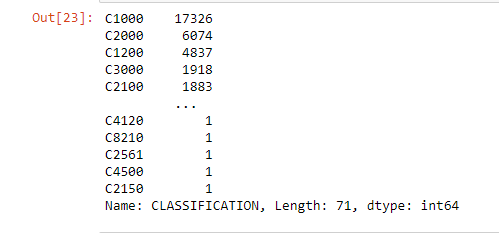

### Model Compilation, Training and Evaluation

#### Initial Design

- The initial configuration for the neural network that we used was had four hidden layers.
    - These hidden layers had 16, 12, 8 and 4 nodes in order from the first to the final layer.
    - This design was chosen due to the high number of features our data had after binary encoding. The aim was to let the network learn to take the large number of variables and gradually narrow the important factors down.
- The tanh function was used for activation in the hidden layers.
    - This function was chosen initially because it is symmetric around zero, unlike the sigmoid, and the relu was not used since it has a derivative of 0 for all negative values which would hamper the training.
- For the output activation, relu was selected for the initial tests.

Below are the accuracy results of the initial design.

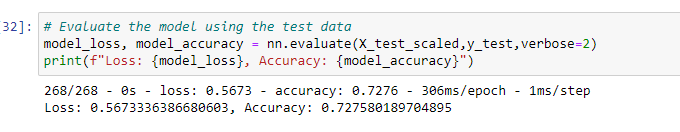

#### Preprocessing Optimization
Our first step in optimizing our model was examining how we processed the data beforehand. As mentioned earlier, we decided that the 'STATUS' variable would not be relevant for our model since it could potentially be deceiving to the network and because organizations requesting funding would be active.

Another way that we worked to optimize the model was by examining how we binned the categorical data. We did not change which features we were going to bin. As shown below, the 'CLASSIFICATION' and 'APPLICATION_TYPE' columns were the only ones with a number of unique values high enough that we felt it was necessary, the 'ASK_AMT' being numerical not necesitating such a treatment.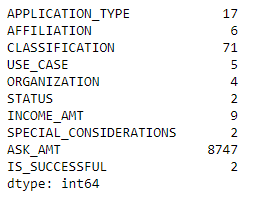
What we could vary was the threshold for categories in each feature to be classified as 'Other.' Our initial testing was done using a threshold of 200 counts to delimit this. This resulted in the 'Other' category being comparable to the lower count categories in both as shown below.

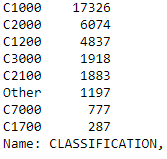

By testing out initial design with various different cutoff values, we were able to get a slightly more accurate result than the initial configuration by using cutoff values of 100 and 150 for the 'APPLICATION_TYPE' and 'CLASSIFICATION' respectively.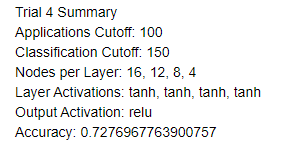

#### Configuration Optimization
After finding the cutoff values that yielded the more accurate results, we then began to vary the design of our model to see if any change to the overall design of the network would result in more accuracy. We tested combinations of the below listed changes to see if any resulted in a better model.

- Alternating between tanh and relu as the activation functions in the hidden layer, starting with relu.
- Using 3 hidden layers instead of four.
    - Instead of testing this with alternating, in that test the first two layers were tanh with the final hidden layer being relu.
- Using a sigmoid for the activation function of the output layer instead of relu.

Out of these alternatives we tested, only one resulted in a higher accuracy. Replacing the relu function with a sigmoid in the output layer with the tanh function in the hidden layers resulted in the most accurate results out of all the ones we tested as shown below.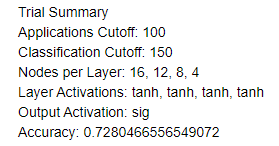

#### Final Design and Accuracy
After the testing we did, we made some changes to our original design. The new design and the changes are outlined below.

- The cutoff thresholds for the 'APPLICATION_TYPE' and 'CLASSIFICATION' columns were both lowered from their initial values of 200.
    - This was done because the testing revealed higher accuracy at other values.
    - We believe that the initial cutoff values got rid of too much data.
    - 'APPLICATION_TYPE' Cutoff: 100
    - 'CLASSIFICATION' Cutoff: 150
- The number of hidden layers, nodes and their activation functions remained unchanged.
    - Testing showed that modifying this only decreased accuracy.
    - Hidden Layers: 4
    - Nodes (1st to last): 16, 12, 8, 4
    - Activation Functions: tanh for all layers.
- The output activation function was changed to be a sigmoid instead of a relu.
    - We believe that the model was more accurate since the sigmoid function is more suited for training the data due to relu having a flat gradient for values below zero.

Despite these changes, the model did not reach the desired accuracy of 75% as the highest accuracy it reached was 72.8%.

## Summary

The neural network model did not reach the set target. Out of the different configurations we tested, most had an accuracy of between 72-73% with only very slight variations depending on the changes. Perhaps further work can be done to hone in the model but looking at the data, I would recommend attempting to reduce the dimensionality of the dataset using PCA and then performing cluster analysis with k-means.